In [1]:
import sys

sys.path.append('/cluster/home/haroldh/spGDMM/3_src/1_data')

from fetch_sinmod_data import fetch_sinmod_data
from create_sample_locations import create_sample_locations

no_sites = 100
time_idx = 285
# Creating biomod training data
sampled_locations = create_sample_locations(no_sites, time_idx)

# Define constants
biomod_sinmod_path = "/cluster/home/haroldh/spGDMM/1_data/1_raw/biostates_surface_normalised.nc"
biomod_target_variables = [
    'diatoms', 'flagellates', 'ciliates', 'HNANO', 'bacteria',
    'calanus_finmarchicus', 'calanus_glacialis'
]

biomod = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables)

# Define constants
# Here the SINMOD_features dataset must have a 'stat' dimension. ALl features in stat dimension will be used.
path = '/cluster/home/haroldh/spGDMM/1_data/4_interim/SINMOD_features.nc'
target_variables = [
    'temperature', 'salinity'
]

midnor = fetch_sinmod_data(path, sampled_locations, target_variables, target=False)

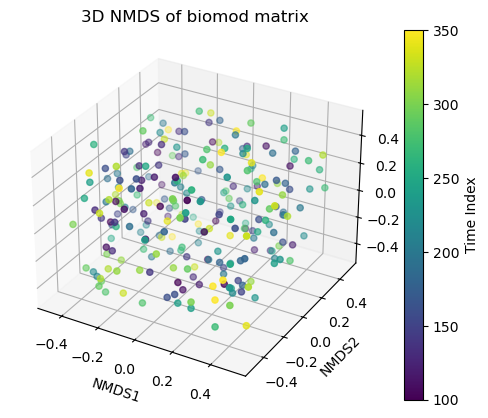

Stress: 0.2426118380976039


In [18]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the biomod matrix from column 4 onward
biomod_matrix = final_results.iloc[:, 3:].values

# Run NMDS
nmds = MDS(n_components=3, metric=False, max_iter=500, random_state=42, dissimilarity='precomputed')
# Compute the Bray-Curtis dissimilarity matrix
dissimilarity_matrix = squareform(pdist(biomod_matrix, metric='braycurtis'))

# Fit NMDS with the precomputed dissimilarity matrix
nmds_fit = nmds.fit_transform(dissimilarity_matrix)

# Plot the NMDS result, color by time_index
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(nmds_fit[:, 0], nmds_fit[:, 1], nmds_fit[:, 2], c=final_results['time_idx'], cmap='viridis')
plt.colorbar(sc, label='Time Index')
ax.set_title('3D NMDS of biomod matrix')
ax.set_xlabel('NMDS1')
ax.set_ylabel('NMDS2')
ax.set_zlabel('NMDS3')
plt.show()

print(f"Stress: {nmds.stress_}")

In [13]:
import pandas as pd
results = []
for time_index in range(100,360,10):

    sampled_locations = create_sample_locations(10, time_index)
    result = fetch_sinmod_data(biomod_sinmod_path, sampled_locations, biomod_target_variables)

    results.append(result)

final_results = pd.concat(results)

In [17]:
final_results.head(11)

,x,y,time_idx,diatoms,flagellates,ciliates,HNANO,bacteria,calanus_finmarchicus,calanus_glacialis
0,110400.0,284800.0,100,0.275546,0.067844,0.192731,0.056137,0.394364,0.013378,0.0
1,524000.0,398400.0,100,0.173720,0.097772,0.085986,0.059702,0.373140,0.209681,0.0
2,751200.0,286400.0,100,0.108194,0.041359,0.631498,0.020744,0.190312,0.007893,0.0
3,709600.0,257600.0,100,0.226545,0.106599,0.125390,0.057125,0.466956,0.017385,0.0
4,49600.0,201600.0,100,0.261663,0.020970,0.239285,0.102389,0.338922,0.036771,0.0
5,228800.0,246400.0,100,0.278736,0.032614,0.249144,0.080932,0.347668,0.010907,0.0
6,96000.0,184000.0,100,0.286769,0.041691,0.192505,0.076573,0.384571,0.017892,0.0
7,460000.0,48800.0,100,0.138065,0.014505,0.420645,0.043666,0.383010,0.000110,0.0
8,706400.0,388800.0,100,0.201203,0.104165,0.137024,0.044222,0.364171,0.149216,0.0
9,416800.0,341600.0,100,0.132004,0.077030,0.127873,0.045782,0.284340,0.332971,0.0


In [7]:
biomod.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/biomod.csv', index=False)

In [8]:
midnor.to_csv('/cluster/home/haroldh/spGDMM/1_data/2_processed/training/midnor.csv', index=False)